# Taller #2
# Juan Esteban Acosta 
# Finanzas Computacionales


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy import stats
%pip install yfinance
import yfinance as yf
import warnings
from scipy.optimize import linprog

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Punto 1
Dibujar la región factible el siguiente problema de programación lineal (LP) con dos
variables:

máx 2 x1 − x2
x1 + x2 ≥ 1
x1 − x2 ≤ 0
3 x1 + x2 ≤ 6
x1, x2 ≥ 0

NameError: ignored

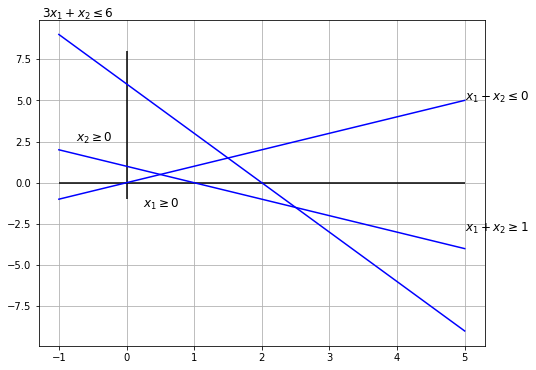

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Lineas de restricción
ax.hlines(0, -1, 5)
ax.vlines(0, -1, 8)
ax.plot(np.linspace(-1, 5, 100), 1-1*np.linspace(-1, 5, 100), color="b")
ax.plot(np.linspace(-1, 5, 100), np.linspace(-1, 5, 100), color="b")
ax.plot(np.linspace(-1, 5, 100), 6-3*np.linspace(-1, 5, 100), color="b")
ax.text(5, -3, "$x_1 + x_2 \geq 1$", size=12)
ax.text(5, 5, "$x_1 - x_2 \leq 0$", size=12)
ax.text(-1.25, 10, "$3x_1 + x_2 \leq 6$", size=12)
ax.text(0.25, -1.5, "$x_1 \geq 0$", size=12) 
ax.text(-0.75, 2.5, "$x_2 \geq 0$", size=12) 

# Región Factible
feasible_set = Polygon(np.array([[0, 1], 
                                 [0.5, 0.5], 
                                 [1.5, 1.5], 
                                 [0, 6]]), 
                       color="red")
ax.add_patch(feasible_set)


# Punto óptimo
ax.plot(1.5, 1.5, "*", color="blue")
ax.text(1.5, 1.5, "Punto Óptimo", size=12)

plt.show()

# Punto 2
Usted desea invertir la suma de $80 millones en cuatro fondos mutuos que tienen
diferentes retornos esperados (E(Ri

)), así como diferentes ponderaciones en acciones de

capitalización grande, mediana y pequeña, como muestra la siguiente tabla:
Capitalización Fondo 1 Fondo 2 Fondo 3 Fondo 4
Grande 50% 30% 25% 60%
Mediana 30% 10% 40% 20%
Pequeña 20% 60% 35% 20%
E(Ri
) 10% 15% 16% 8%

La asignación anterior debe contener al menos un 35 % de acciones de gran capitalización,
un 30% de mediana capitalización y un 15% de acciones de pequeña capitalización.
Encuentre una asignación factible con el retorno esperado más alto, bajo el supuesto de que
solo se le permite mantener posiciones largas en los fondos. Para ello, formule y resuelva el
problema de programación lineal, bajo las siguientes restricciones:
0.5 x1 + 0.3 x2 + 0.25 x3 + 0.6 x4 ≥ 0.35 × $80 (Cap. Grande)
0.3 x1 + 0.1 x2 + 0.4 x3 + 0.2 x4 ≥ 0.30 × $80 (Cap. Mediana)
0.2 x1 + 0.6 x2 + 0.35 x3 + 0.2 x4 ≥ 0.15 × $80 (Cap. pequeña)

x1 + x2 + x3 + x4 = $80
x1, x2, x3, x4 ≥ 0

Nota: resuelva el problema anterior usando las librerías de Linprog y CVXPY de Python.
Además, construya un archivo de Excel para comparar los resultados.

In [21]:

c = np.array([0.1,0.15,0.16,0.08])
A = np.array([[1,1,1,1]])
b = np.array([80])

D = np.array([[0.5,0.3,0.25,0.6],
              [0.3,0.1,0.4,0.2],
              [0.2,0.6,0.35,0.2]])
d = np.array([28,24,12])

resultado = linprog(-c,A_ub=-D,b_ub=-d,A_eq=A,b_eq=b, method='simplex')
resultado
#x.value


     con: array([0.])
     fun: -10.989473684210527
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([-3.55271368e-15, -3.55271368e-15,  1.60000000e+01])
  status: 0
 success: True
       x: array([ 0.        , 12.63157895, 46.31578947, 21.05263158])

# Punto 3
La empresa XYZ se enfrente al siguiente problema de financiación a corto plazo. Las
cifras están expresadas en millones ($).

1 2 3 4 5 6
Mes Ene Feb Mar Abr May Jun
FC neto -150 -100 200 -200 50 300
Además, se sabe que la empresa cuenta con las siguientes fuentes de recursos:
• Una línea de crédito de hasta $100 a una tasa de interés del 1% mensual.
• Puede emitir papel comercial a 90 días con un interés total del 2% por un período de
3 meses.
• Todos los meses se pueden invertir los fondos sobrantes a una tasa de interés del
0,3% mensual. Por ejemplo, la empresa podría hacer un depósito bancario que le
reconoce esa tasa.

Sobre este problema, la empresa desea saber si: ¿usar la línea de crédito en algunos de los
meses le representa un alto costo? si es así ¿cuándo debería usarla? ¿cuánto cuesta? ¿qué
pagos de intereses tendrá que hacer entre enero y junio? etc... Para responder a estos
interrogantes, la empresa puede formular y resolver un problema LP de forma rápida y
sencilla. Para la formulación del problema de LP, tenga en cuenta:
Variables:
xj
: monto dispuesto a pedir en la línea de crédito en el mes j, para j = 1,2,3,4,5.
yj
: monto emitido en el papel comercial en el mes j, para j = 1,2,3.
zj
: exceso de fondos (FC) en el mes j, para j = 1,2,3,4,5,6.
Objetivo: Maximizar el exceso de fondos (FC) en el mes 6 (Jun):

máx z6

Restricciones: Restricciones de saldo de caja en cada mes y límites en xj
, yj y zj
.

x1 + y1 − z1 = 150
x2 + y2 −1.01 x1 + 1.003 z1 − z2 = 100
x3 + y3 −1.01 x2 + 1.003 z2 − z3 = −200
x4 − 1.02 y1 −1.01 x3 + 1.003 z3 − z4 = 200
x5 − 1.02 y2 −1.01 x4 + 1.003 z4 − z5 = −50
−1.02 y3 −1.01 x5 + 1.003 z5 − z6 = −300

xj ≤ 100 para j = 1,2,3,4,5
xj ≥ 0 para j = 1,2,3,4,5
yj ≥ 0 para j = 1,2,3.
zj ≥ 0 para j = 1,2,3,4,5

Nota: resuelva el problema anterior usando las librerías de Linprog y CVXPY de Python.
Además, construya un archivo de Excel para comparar los resultados.

In [22]:
#Construcción de vectores
b = np.array([150, 100, -200, 200, -50, -300])
c = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Función objetivo
rx = np.array([1.01])  #tasa del crédito
ry = np.array([1.02]) #Tasa del bono
rz = np.array([1.003]) #Tasa excedente
A = np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
              [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
              [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
              [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
              [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
              [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]])

#Solución con cvxpy
n = len(c) # # de elementos que requiere el vector c
x = cp.Variable(n) #Mismo tamaño de c porque se debe operar x con c

objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b, x>=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
sol = round(pd.DataFrame(x.value),6)
sol


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


,0
0,0.000001
1,42.686747
2,0.000000
3,0.000000
4,8.459517
5,150.000000
6,57.313253
7,195.057783
8,0.000001
9,0.000000


# Punto 4
Para las variables aleatorias, xi y yi con i = 1,2, ... , N; demuestre que el vector de
coeficientes β del modelo lineal y = β̂TX + ε, obtenido a partir de la estimación por MCO,
viene dado por:

β̂ = Q
−1b = (X
TX)
−1X
Ty (4.1)

Donde: X es la matrix N × m, con m variables explicativas. Además, Q = (X
TX)
−1 y b = X
Ty.
Tener en cuenta que el problema MCO anterior, se puede formular como un problema de
programación cuadrática (QP) sin restricciones:

min
β
0.5 β
TQβ − b
Tβ (4.2)

O de forma equivalente:

min
β
∑ (β
Txi − yi
)
N 2
i=1

(4.3)

Nota: Para probar la expresión 4.1 puede seleccionar un activo y un conjunto de factores.
Implemente el problema usando Linprog.

# Punto 5
Un fondo de pensiones necesita cubrir algunos pasivos en los próximos seis años según
los siguientes requerimientos de efectivo (cifras en millones $):

1 2 3 4 5 6
Requerimiento 100 200 800 100 800 1200

Además, asuma que el fondo de pensiones puede invertir en diez bonos del gobierno con
los flujos de efectivo y los precios actuales como se muestra a continuación:

Años

1 2 3 4 5 6 Precio
Bono 1 10 10 10 10 10 110 109
Bono 2 7 7 7 7 7 107 94.8
Bono 3 8 8 8 8 8 108 99.5
Bono 4 6 6 6 6 106 93.1
Bono 5 7 7 7 7 107 97.2
Bono 6 5 5 5 105 92.9
Bono 7 10 10 110 110
Bono 8 8 8 108 104
Bono 9 7 107 102
Bono 10 100 95.2

Encuentre el portafolio de bonos menos costoso cuyos flujos de efectivo serán suficientes
para cubrir los requerimientos de efectivo del fondo. Además, asuma que el excedente de
efectivo puede transferirse de un año al siguiente sin generar intereses. Formule y resuelva
problema LP.
Nota: tener en cuenta las variables de holgura en su formulación. Implemente el problema
usando Linprog o CVX.